In [1]:
import os
import pandas as pd
import numpy as np
import glob

desired_width = 320
pd.set_option('display.width', desired_width)
np.set_printoptions(linewidth=desired_width)
pd.set_option('display.max_columns', 10)

In [2]:
##############################################################################
# Load and Clean Rating data                                                 #
##############################################################################
path = r'C:\Users\mbrag\PycharmProjects\RPIA-Capstone\Rating.csv'
df_ratings_raw = pd.read_csv(path)

# drop RatingSPOutlook,RatingSPOutlook columns
df_ratings_no_xtra_col = df_ratings_raw.drop(columns=['RatingSPOutlook', 'RatingSPOutlook.1'])

# drop NA from RatingSP column
df_ratings_clean = df_ratings_no_xtra_col.dropna(subset=['RatingSP'])
df_ratings_clean['KeyDate'] = pd.to_datetime(df_ratings_clean['KeyDate'], errors='coerce')

indexDates = df_ratings_clean[df_ratings_clean['KeyDate'] > '2020-03-01'].index
df_ratings_clean.drop(indexDates, inplace=True)
df_ratings_clean.head(10)

,SecurityID,KeyDate,RatingSP
0,64,2019-06-11,10.0
1,64,2019-06-12,10.0
2,64,2019-06-13,10.0
3,64,2019-06-14,10.0
4,64,2019-06-17,10.0
5,64,2019-06-18,10.0
6,64,2019-06-19,10.0
7,64,2019-06-20,10.0
8,64,2019-06-21,10.0
9,64,2019-06-24,10.0


In [3]:
##############################################################################
# Load and clean Spreads data                                                #
##############################################################################
path = r'C:\Users\mbrag\PycharmProjects\RPIA-Capstone\raw_data_files'
all_files = glob.glob(os.path.join(path, "*.csv"))  # use os.path.join to make concat OS independent

df_from_each_file = (pd.read_csv(f) for f in all_files)
df_merged = pd.concat(df_from_each_file, ignore_index=True, sort=False)

In [4]:
# drop na from spreads data
df_merged = df_merged.dropna(how='any')
# convert dates to Date type
df_merged['KeyDate'] = pd.to_datetime(df_merged['KeyDate'], errors='coerce')

# clean the dataset by removing the low liers and NaNs
df_merged_clean = df_merged#[~df_merged['KeyDate'].isin(dates_low_liers.index)]

# drop rows after March 1st 2020
indexDates = df_merged_clean[ df_merged_clean['KeyDate'] > '2020-03-01' ].index
df_merged_clean.drop(indexDates , inplace=True)

In [5]:
df_merged_clean.head(25)

,SecurityID,KeyDate,Price,YieldWorst,ModifiedDuration_Plain,...,AmtOutstanding,GSpread,OAS_Spread,ZSpread,AswUsd
0,64,2018-12-31,91.0976,6.49918,6.06004,...,1.697266e+09,389.13,345.604,385.493,357.653
1,64,2019-01-02,90.8950,6.53581,6.05466,...,1.697266e+09,399.42,351.010,390.586,361.970
2,64,2019-01-03,90.8199,6.55070,6.04601,...,1.697266e+09,409.20,365.010,405.634,375.736
3,64,2019-01-04,92.0500,6.33260,6.06068,...,1.697266e+09,381.59,329.922,371.585,346.809
4,64,2019-01-07,93.4350,6.09098,6.07716,...,1.697266e+09,347.39,300.014,344.978,324.979
5,64,2019-01-08,94.1644,5.96554,6.08450,...,1.697266e+09,331.30,281.457,328.040,310.566
6,64,2019-01-09,94.7400,5.86738,6.08968,...,1.697266e+09,323.50,270.271,318.174,302.289
7,64,2019-01-10,94.3312,5.93815,6.07661,...,1.697266e+09,327.72,278.369,324.706,307.612
8,64,2019-01-11,94.4928,5.91076,6.07625,...,1.697266e+09,329.24,278.423,325.285,308.512
9,64,2019-01-14,94.0064,5.99462,6.06718,...,1.697266e+09,337.70,287.512,332.855,314.662


In [6]:
##############################################################################
# Load and clean Securities META DATA                                        #
##############################################################################
path = r'C:\Users\mbrag\PycharmProjects\RPIA-Capstone\SecurityData.csv'  # use your path
df_securities = pd.read_csv(path)

# filter out CountryDomicile=US  ********** METADATA **************
df_securities_US = df_securities.loc[df_securities['CountryDomicile'] == 'US']


##############################################################################
# Merge all the datasets into one DataFrame / File                           #
##############################################################################

# left join RatingSP from df_rating on df_securities and replace NA with zero
df_merged_clean_w_rating = df_merged_clean.merge(df_ratings_clean, on = ['SecurityID', 'KeyDate'], how = 'left')
df_merged_clean_w_rating_US = df_merged_clean_w_rating.merge(df_securities_US, on = ['SecurityID'], how = 'left')
df_merged_clean_w_rating_US = df_merged_clean_w_rating_US.dropna(subset=['CountryDomicile'])


df_merged_clean_w_rating_US.head(10)


,SecurityID,KeyDate,Price,YieldWorst,ModifiedDuration_Plain,...,QuoteSize,AmountIssued,MinIncrement,MinPiece,BBGDescription
0,64,2018-12-31,91.0976,6.49918,6.06004,...,100.0,1.750000e+09,1000.0,2000.0,NaN
1,64,2019-01-02,90.8950,6.53581,6.05466,...,100.0,1.750000e+09,1000.0,2000.0,NaN
2,64,2019-01-03,90.8199,6.55070,6.04601,...,100.0,1.750000e+09,1000.0,2000.0,NaN
3,64,2019-01-04,92.0500,6.33260,6.06068,...,100.0,1.750000e+09,1000.0,2000.0,NaN
4,64,2019-01-07,93.4350,6.09098,6.07716,...,100.0,1.750000e+09,1000.0,2000.0,NaN
5,64,2019-01-08,94.1644,5.96554,6.08450,...,100.0,1.750000e+09,1000.0,2000.0,NaN
6,64,2019-01-09,94.7400,5.86738,6.08968,...,100.0,1.750000e+09,1000.0,2000.0,NaN
7,64,2019-01-10,94.3312,5.93815,6.07661,...,100.0,1.750000e+09,1000.0,2000.0,NaN
8,64,2019-01-11,94.4928,5.91076,6.07625,...,100.0,1.750000e+09,1000.0,2000.0,NaN
9,64,2019-01-14,94.0064,5.99462,6.06718,...,100.0,1.750000e+09,1000.0,2000.0,NaN


In [7]:
df_merged_clean_w_rating_US.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2785579 entries, 0 to 4429433
Data columns (total 59 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   SecurityID              int64         
 1   KeyDate                 datetime64[ns]
 2   Price                   float64       
 3   YieldWorst              float64       
 4   ModifiedDuration_Plain  float64       
 5   WorkoutDate             object        
 6   AmtOutstanding          float64       
 7   GSpread                 float64       
 8   OAS_Spread              float64       
 9   ZSpread                 float64       
 10  AswUsd                  float64       
 11  RatingSP                float64       
 12  OfficialName            object        
 13  SecurityType            object        
 14  SecuritySubType         object        
 15  SecurityBBGType         object        
 16  SecurityBBGYellowKey    object        
 17  Series                  object        
 18  Se

In [8]:
# drop rows from df_securities_US_w_data without average spreads
df_merged_clean_w_rating_US = df_merged_clean_w_rating_US.dropna(subset=['Price', 'YieldWorst', 'ModifiedDuration_Plain',
                                                                       'AmtOutstanding', 'GSpread', 'OAS_Spread', 
                                                                       'ZSpread', 'AswUsd'])

In [9]:
df_merged_clean_w_rating_US.fillna(value=0, inplace=True)
#df_merged_clean_w_rating_US.info()

In [10]:
#calculate average values on a weekly basis
df_merged_clean_w_rating_US_weekly = df_merged_clean_w_rating_US.groupby('SecurityID').apply(lambda x: x.resample('7D', on='KeyDate').mean())

In [11]:
#calculate the maximum number of weeks per security
week_number = max(df_merged_clean_w_rating_US_weekly['SecurityID'].map(df_merged_clean_w_rating_US_weekly['SecurityID'].value_counts()))
print(week_number)

61.0


In [12]:
df_merged_clean_w_rating_US_weekly = df_merged_clean_w_rating_US_weekly[df_merged_clean_w_rating_US_weekly['SecurityID'].map(df_merged_clean_w_rating_US_weekly['SecurityID'].value_counts()) >= 60]

In [13]:
df_merged_clean_w_rating_US_weekly.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 466683 entries, (64, Timestamp('2018-12-31 00:00:00')) to (56289, Timestamp('2020-02-24 00:00:00'))
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   SecurityID              466683 non-null  float64
 1   Price                   466683 non-null  float64
 2   YieldWorst              466683 non-null  float64
 3   ModifiedDuration_Plain  466683 non-null  float64
 4   AmtOutstanding          466683 non-null  float64
 5   GSpread                 466683 non-null  float64
 6   OAS_Spread              466683 non-null  float64
 7   ZSpread                 466683 non-null  float64
 8   AswUsd                  466683 non-null  float64
 9   RatingSP                466683 non-null  float64
 10  ObligorID               466683 non-null  float64
 11  Coupon                  466683 non-null  float64
 12  CouponFrequency         466683 non-null  float64
 13  Is

In [14]:
df_merged_clean_w_rating_US_weekly.head(10)

SecurityID      Price  YieldWorst  ModifiedDuration_Plain  AmtOutstanding  ...  IsJunior  QuoteSize  AmountIssued  MinIncrement  MinPiece
SecurityID KeyDate                                                                                ...                                                           
64         2018-12-31        64.0  91.215625    6.479572                6.055347    1.697266e+09  ...       0.0      100.0  1.750000e+09        1000.0    2000.0
           2019-01-07        64.0  94.232680    5.954562                6.080840    1.697266e+09  ...       0.0      100.0  1.750000e+09        1000.0    2000.0
           2019-01-14        64.0  94.559620    5.900876                6.066472    1.697266e+09  ...       0.0      100.0  1.750000e+09        1000.0    2000.0
           2019-01-21        64.0  94.768125    5.867145                6.050797    1.697266e+09  ...       0.0      100.0  1.750000e+09        1000.0    2000.0
           2019-01-28        64.0  94.511480    5.912302                6.033516    1.697266e+09  ...       0.0      100.0  1.750000e+09        1000.0    2000.0
           2019-02-04        64.0  95.390020    5.764226                6.027908    1.697266e+09  ...       0.0      100.0  1.750000e+09        1000.0    2000.0
           2019-02-11        64.0  95.793100    5.697290                6.088066    1.697266e+09  ...       0.0      100.0  1.750000e+09        1000.0    2000.0
           2019-02-18        64.0  96.023050    5.659505                6.121488    1.697266e+09  ...       0.0      100.0  1.750000e+09        1000.0    2000.0
           2019-02-25        64.0  96.191060    5.632248                6.104472    1.697266e+09  ...       0.0      100.0  1.750000e+09        1000.0    2000.0
           2019-03-04        64.0  96.293820    5.616184                6.085886    1.697266e+09  ...       0.0      100.0  1.750000e+09        1000.0    2000.0

[10 rows x 27 columns]

In [15]:
def check_outlier(x):
    if x > 1 or x < -1:
        return "True"
    else:
        return "False"

In [16]:
# CALCULATES PCT CHANGE WEEK OVER WEEK  

all_securities = set(df_merged_clean_w_rating_US_weekly['SecurityID'])

dfs_array = []
for s in all_securities:
    try:
        temp_df = df_merged_clean_w_rating_US_weekly[df_merged_clean_w_rating_US_weekly['SecurityID'] == s].copy()
        
        g_pct_change = temp_df.GSpread.pct_change(
             periods=1
        ).values
        
        g_change = temp_df.GSpread.diff(
             periods=1
        ).values
        
        
        temp_df['GSpread_pct_change'] = g_pct_change
        
        temp_df['GSpread_change'] = g_change
        
        temp_df['outlier'] = temp_df.GSpread_pct_change.apply(check_outlier)
        
        dfs_array.append(temp_df)
    except:
        pass

df_clean_US_w_pct_change = pd.concat(dfs_array)
df_clean_US_w_pct_change = df_clean_US_w_pct_change.reset_index('KeyDate')
df_clean_US_w_pct_change.head(10)

,KeyDate,SecurityID,Price,YieldWorst,ModifiedDuration_Plain,...,MinIncrement,MinPiece,GSpread_pct_change,GSpread_change,outlier
SecurityID,,,,,,,,,,,
32768,2018-12-31,32768.0,92.494450,4.308855,16.590950,...,1000.0,2000.0,NaN,NaN,False
32768,2019-01-07,32768.0,91.832220,4.351932,16.531620,...,1000.0,2000.0,-0.016983,-2.316,False
32768,2019-01-14,32768.0,90.964600,4.409080,16.454940,...,1000.0,2000.0,0.004356,0.584,False
32768,2019-01-21,32768.0,91.597175,4.367787,16.485625,...,1000.0,2000.0,-0.011869,-1.598,False
32768,2019-01-28,32768.0,92.375660,4.317096,16.530120,...,1000.0,2000.0,-0.027135,-3.610,False
32768,2019-02-04,32768.0,92.761080,4.292596,16.543200,...,1000.0,2000.0,-0.005903,-0.764,False
32768,2019-02-11,32768.0,92.967880,4.279408,16.665240,...,1000.0,2000.0,0.002021,0.260,False
32768,2019-02-18,32768.0,93.498400,4.245628,16.768825,...,1000.0,2000.0,-0.026922,-3.471,False
32768,2019-02-25,32768.0,92.652900,4.300052,16.695240,...,1000.0,2000.0,0.006082,0.763,False


In [17]:
df_clean_US_w_pct_change = df_clean_US_w_pct_change.replace([np.inf, -np.inf], np.nan)
df_clean_US_w_pct_change.fillna(value=0, inplace=True)

In [18]:
df_clean_US_w_pct_change.dropna(subset=['GSpread_change'], inplace = True)

In [19]:
# exclude Mar 2020 onwards due to Covid impact on trends

In [20]:
df_clean_US_w_pct_change = df_clean_US_w_pct_change[df_clean_US_w_pct_change['KeyDate'].between('2018-12-31', '2020-03-02')]

In [21]:
# remove outliers 

In [22]:
df_clean_US_w_pct_change.drop(df_clean_US_w_pct_change[df_clean_US_w_pct_change.outlier == "True"].index, inplace=True)

In [23]:
df_clean_US_w_pct_change.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 434980 entries, 32768 to 32767
Data columns (total 31 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   KeyDate                 434980 non-null  datetime64[ns]
 1   SecurityID              434980 non-null  float64       
 2   Price                   434980 non-null  float64       
 3   YieldWorst              434980 non-null  float64       
 4   ModifiedDuration_Plain  434980 non-null  float64       
 5   AmtOutstanding          434980 non-null  float64       
 6   GSpread                 434980 non-null  float64       
 7   OAS_Spread              434980 non-null  float64       
 8   ZSpread                 434980 non-null  float64       
 9   AswUsd                  434980 non-null  float64       
 10  RatingSP                434980 non-null  float64       
 11  ObligorID               434980 non-null  float64       
 12  Coupon                  434

In [24]:
!pip install tsfresh

In [41]:
#extract features 
from tsfresh import extract_features
feature_data = extract_features(df_clean_US_w_pct_change[['SecurityID','KeyDate','GSpread_change']],column_id="SecurityID", column_sort="KeyDate")

Feature Extraction: 100%|██████████| 30/30 [01:27<00:00,  2.91s/it]


In [44]:
feature_data = feature_data.replace([np.inf, -np.inf], np.nan)
feature_data.fillna(value=0, inplace=True)

In [51]:
feature_data = feature_data.reset_index().rename(columns={'id': 'SecurityID'})
feature_data['SecurityID'] = feature_data['SecurityID'].astype(int)
feature_data.head(10)

variable,level_0,index,SecurityID,GSpread_change__abs_energy,GSpread_change__absolute_sum_of_changes,...,GSpread_change__value_count__value_0,GSpread_change__value_count__value_1,GSpread_change__variance,GSpread_change__variance_larger_than_standard_deviation,GSpread_change__variation_coefficient
0,0,0,64,2.929430e+04,1112.102542,...,1.0,0.0,478.265163,1.0,-15.584366
1,1,1,82,3.316741e+03,424.720228,...,1.0,0.0,53.645370,1.0,-8.587533
2,2,2,83,2.794035e+03,373.566894,...,1.0,0.0,42.082366,1.0,-3.362729
3,3,3,87,2.552041e+03,393.632394,...,1.0,0.0,39.603824,1.0,-4.211457
4,4,4,109,3.884066e+03,397.259390,...,1.0,1.0,61.884625,1.0,-5.882164
5,5,5,110,1.864421e+06,9780.495068,...,1.0,0.0,28477.976199,1.0,3.694591
6,6,6,121,1.858730e+03,249.493138,...,1.0,0.0,26.604642,1.0,-2.623184
7,7,7,130,4.614662e+03,509.611102,...,1.0,0.0,69.085951,1.0,-3.244162
8,8,8,135,1.744261e+04,896.066050,...,1.0,0.0,279.460891,1.0,-6.565305
9,9,9,144,1.579081e+04,995.982386,...,1.0,0.0,250.756701,1.0,-5.560838


In [52]:
fdata1 = feature_data.dropna(axis='columns')
feature_data_arr = fdata1.loc[:, ~(fdata1 == fdata1.iloc[0]).all()]

feature_data_arr.head(20)

variable,level_0,index,SecurityID,GSpread_change__abs_energy,GSpread_change__absolute_sum_of_changes,...,GSpread_change__value_count__value_0,GSpread_change__value_count__value_1,GSpread_change__variance,GSpread_change__variance_larger_than_standard_deviation,GSpread_change__variation_coefficient
0,0,0,64,2.929430e+04,1112.102542,...,1.0,0.0,478.265163,1.0,-15.584366
1,1,1,82,3.316741e+03,424.720228,...,1.0,0.0,53.645370,1.0,-8.587533
2,2,2,83,2.794035e+03,373.566894,...,1.0,0.0,42.082366,1.0,-3.362729
3,3,3,87,2.552041e+03,393.632394,...,1.0,0.0,39.603824,1.0,-4.211457
4,4,4,109,3.884066e+03,397.259390,...,1.0,1.0,61.884625,1.0,-5.882164
5,5,5,110,1.864421e+06,9780.495068,...,1.0,0.0,28477.976199,1.0,3.694591
6,6,6,121,1.858730e+03,249.493138,...,1.0,0.0,26.604642,1.0,-2.623184
7,7,7,130,4.614662e+03,509.611102,...,1.0,0.0,69.085951,1.0,-3.244162
8,8,8,135,1.744261e+04,896.066050,...,1.0,0.0,279.460891,1.0,-6.565305
9,9,9,144,1.579081e+04,995.982386,...,1.0,0.0,250.756701,1.0,-5.560838


In [53]:
from sklearn.preprocessing import normalize,StandardScaler,MinMaxScaler

sc = MinMaxScaler()

data_scaled = sc.fit_transform(feature_data_arr)
data_scaled = normalize(data_scaled)

In [54]:
from sklearn import metrics
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import itertools
from scipy.spatial.distance import cdist

from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from time import time
%matplotlib inline

#### marked down do not run
K = range(1,30)

distortions = []

for k in K:
    print(f"k is {k}")
    km = KMeans(
        n_clusters=k, init='k-means++',
        n_init=30, max_iter=500, random_state=42
    ).fit(data_scaled)
    km.fit(data_scaled)
    distortions.append(sum(np.min(cdist(data_scaled, km.cluster_centers_, 'euclidean'), axis=1)) / data_scaled.shape[0])


plt.figure(figsize=(14,8))
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')    
plt.plot(K, distortions, marker='o')
plt.grid()
plt.show()

In [55]:
US_sec_with_features_1perSec = df_clean_US_w_pct_change.merge(feature_data, on = 'SecurityID', how = 'left')
US_sec_with_features_1perSec.head(10)   

,KeyDate,SecurityID,Price,YieldWorst,ModifiedDuration_Plain,...,GSpread_change__value_count__value_0,GSpread_change__value_count__value_1,GSpread_change__variance,GSpread_change__variance_larger_than_standard_deviation,GSpread_change__variation_coefficient
0,2018-12-31,32768.0,92.494450,4.308855,16.590950,...,1.0,0.0,9.313444,1.0,51.434211
1,2019-01-07,32768.0,91.832220,4.351932,16.531620,...,1.0,0.0,9.313444,1.0,51.434211
2,2019-01-14,32768.0,90.964600,4.409080,16.454940,...,1.0,0.0,9.313444,1.0,51.434211
3,2019-01-21,32768.0,91.597175,4.367787,16.485625,...,1.0,0.0,9.313444,1.0,51.434211
4,2019-01-28,32768.0,92.375660,4.317096,16.530120,...,1.0,0.0,9.313444,1.0,51.434211
5,2019-02-04,32768.0,92.761080,4.292596,16.543200,...,1.0,0.0,9.313444,1.0,51.434211
6,2019-02-11,32768.0,92.967880,4.279408,16.665240,...,1.0,0.0,9.313444,1.0,51.434211
7,2019-02-18,32768.0,93.498400,4.245628,16.768825,...,1.0,0.0,9.313444,1.0,51.434211
8,2019-02-25,32768.0,92.652900,4.300052,16.695240,...,1.0,0.0,9.313444,1.0,51.434211
9,2019-03-04,32768.0,92.885360,4.285180,16.695860,...,1.0,0.0,9.313444,1.0,51.434211


In [56]:
for col in US_sec_with_features_1perSec.columns:
    print(col)

KeyDate
SecurityID
Price
YieldWorst
ModifiedDuration_Plain
AmtOutstanding
GSpread
OAS_Spread
ZSpread
AswUsd
RatingSP
ObligorID
Coupon
CouponFrequency
IsCallable
IsConvertible
IsContingent
IsFactorable
IsHybrid
IsMaple
IsPrivatePlacement
IsPreliminary
IsPerpetual
IsJunior
QuoteSize
AmountIssued
MinIncrement
MinPiece
GSpread_pct_change
GSpread_change
outlier
level_0
index
GSpread_change__abs_energy
GSpread_change__absolute_sum_of_changes
GSpread_change__agg_autocorrelation__f_agg_"mean"__maxlag_40
GSpread_change__agg_autocorrelation__f_agg_"median"__maxlag_40
GSpread_change__agg_autocorrelation__f_agg_"var"__maxlag_40
GSpread_change__agg_linear_trend__attr_"intercept"__chunk_len_10__f_agg_"max"
GSpread_change__agg_linear_trend__attr_"intercept"__chunk_len_10__f_agg_"mean"
GSpread_change__agg_linear_trend__attr_"intercept"__chunk_len_10__f_agg_"min"
GSpread_change__agg_linear_trend__attr_"intercept"__chunk_len_10__f_agg_"var"
GSpread_change__agg_linear_trend__attr_"intercept"__chunk_len_5

In [57]:
df_all = US_sec_with_features_1perSec[['SecurityID', 'KeyDate', 'GSpread', 'Price', 'RatingSP']]
df_all.head(25)
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 434980 entries, 0 to 434979
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   SecurityID  434980 non-null  float64       
 1   KeyDate     434980 non-null  datetime64[ns]
 2   GSpread     434980 non-null  float64       
 3   Price       434980 non-null  float64       
 4   RatingSP    434980 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 19.9 MB


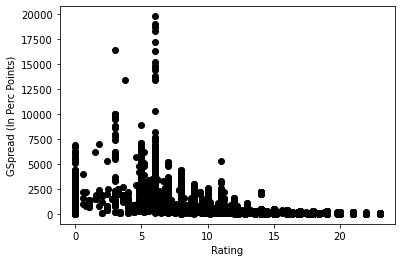

In [58]:
X = df_all[["RatingSP","GSpread"]]
#Visualise data points
plt.scatter(X["RatingSP"],X["GSpread"],c='black')
plt.xlabel('Rating')
plt.ylabel('GSpread (In Perc Points)')
plt.show()

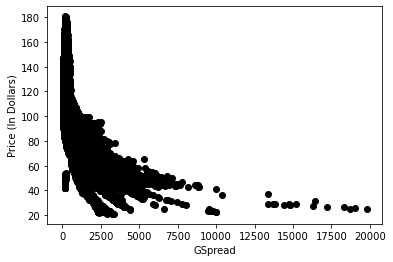

In [59]:
X = df_all[["GSpread","Price"]]
#Visualise data points
plt.scatter(X["GSpread"],X["Price"],c='black')
plt.xlabel('GSpread')
plt.ylabel('Price (In Dollars)')
plt.show()

In [60]:
US_sec_with_features_1perSec = US_sec_with_features_1perSec.fillna(0)

k is 1
k is 2
k is 3
k is 4
k is 5
k is 6
k is 7
k is 8
k is 9
k is 10
k is 11
k is 12
k is 13
k is 14
k is 15
k is 16
k is 17
k is 18
k is 19
k is 20
k is 21
k is 22
k is 23
k is 24
k is 25
k is 26
k is 27
k is 28
k is 29


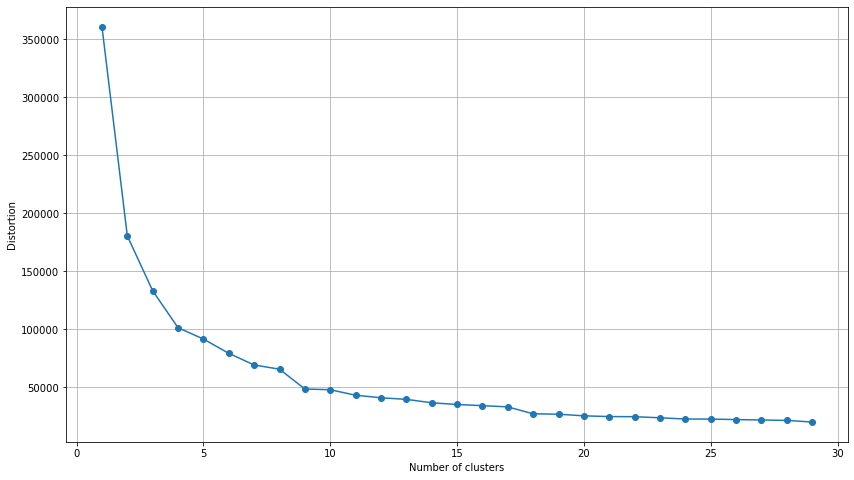

In [61]:
K = range(1,30)
df = US_sec_with_features_1perSec[['GSpread_change__abs_energy',
'GSpread_change__absolute_sum_of_changes',
'GSpread_change__agg_autocorrelation__f_agg_"mean"__maxlag_40',
'GSpread_change__agg_autocorrelation__f_agg_"median"__maxlag_40',
'GSpread_change__agg_autocorrelation__f_agg_"var"__maxlag_40',
'GSpread_change__approximate_entropy__m_2__r_0.1',
'GSpread_change__approximate_entropy__m_2__r_0.3',
'GSpread_change__approximate_entropy__m_2__r_0.5',
'GSpread_change__approximate_entropy__m_2__r_0.7',
'GSpread_change__approximate_entropy__m_2__r_0.9',
'GSpread_change__ar_coefficient__coeff_10__k_10',
'GSpread_change__binned_entropy__max_bins_10',
'GSpread_change__c3__lag_1',
'GSpread_change__c3__lag_2',
'GSpread_change__c3__lag_3',
'GSpread_change__change_quantiles__f_agg_"mean"__isabs_False__qh_0.2__ql_0.0',
'GSpread_change__change_quantiles__f_agg_"mean"__isabs_False__qh_0.4__ql_0.0',
'GSpread_change__change_quantiles__f_agg_"mean"__isabs_False__qh_0.4__ql_0.2',
'GSpread_change__change_quantiles__f_agg_"mean"__isabs_False__qh_0.6__ql_0.0',
'GSpread_change__change_quantiles__f_agg_"mean"__isabs_False__qh_0.6__ql_0.2',
'GSpread_change__change_quantiles__f_agg_"mean"__isabs_False__qh_0.6__ql_0.4',
'GSpread_change__change_quantiles__f_agg_"mean"__isabs_False__qh_0.8__ql_0.0',
'GSpread_change__change_quantiles__f_agg_"mean"__isabs_False__qh_0.8__ql_0.2',
'GSpread_change__change_quantiles__f_agg_"mean"__isabs_False__qh_0.8__ql_0.4',
'GSpread_change__change_quantiles__f_agg_"mean"__isabs_False__qh_0.8__ql_0.6',
'GSpread_change__change_quantiles__f_agg_"mean"__isabs_False__qh_1.0__ql_0.0',
'GSpread_change__change_quantiles__f_agg_"mean"__isabs_False__qh_1.0__ql_0.2',
'GSpread_change__change_quantiles__f_agg_"mean"__isabs_False__qh_1.0__ql_0.4',
'GSpread_change__change_quantiles__f_agg_"mean"__isabs_False__qh_1.0__ql_0.6',
'GSpread_change__change_quantiles__f_agg_"mean"__isabs_False__qh_1.0__ql_0.8',
'GSpread_change__change_quantiles__f_agg_"mean"__isabs_True__qh_0.2__ql_0.0',
'GSpread_change__change_quantiles__f_agg_"mean"__isabs_True__qh_0.4__ql_0.0',
'GSpread_change__change_quantiles__f_agg_"mean"__isabs_True__qh_0.4__ql_0.2',
'GSpread_change__change_quantiles__f_agg_"mean"__isabs_True__qh_0.6__ql_0.0',
'GSpread_change__change_quantiles__f_agg_"mean"__isabs_True__qh_0.6__ql_0.2',
'GSpread_change__change_quantiles__f_agg_"mean"__isabs_True__qh_0.6__ql_0.4',
'GSpread_change__change_quantiles__f_agg_"mean"__isabs_True__qh_0.8__ql_0.0',
'GSpread_change__change_quantiles__f_agg_"mean"__isabs_True__qh_0.8__ql_0.2',
'GSpread_change__change_quantiles__f_agg_"mean"__isabs_True__qh_0.8__ql_0.4',
'GSpread_change__change_quantiles__f_agg_"mean"__isabs_True__qh_0.8__ql_0.6',
'GSpread_change__change_quantiles__f_agg_"mean"__isabs_True__qh_1.0__ql_0.0',
'GSpread_change__change_quantiles__f_agg_"mean"__isabs_True__qh_1.0__ql_0.2',
'GSpread_change__change_quantiles__f_agg_"mean"__isabs_True__qh_1.0__ql_0.4',
'GSpread_change__change_quantiles__f_agg_"mean"__isabs_True__qh_1.0__ql_0.6',
'GSpread_change__change_quantiles__f_agg_"mean"__isabs_True__qh_1.0__ql_0.8',
'GSpread_change__change_quantiles__f_agg_"var"__isabs_False__qh_0.2__ql_0.0',
'GSpread_change__change_quantiles__f_agg_"var"__isabs_False__qh_0.4__ql_0.0',
'GSpread_change__change_quantiles__f_agg_"var"__isabs_False__qh_0.4__ql_0.2',
'GSpread_change__change_quantiles__f_agg_"var"__isabs_False__qh_0.6__ql_0.0',
'GSpread_change__change_quantiles__f_agg_"var"__isabs_False__qh_0.6__ql_0.2',
'GSpread_change__change_quantiles__f_agg_"var"__isabs_False__qh_0.6__ql_0.4',
'GSpread_change__change_quantiles__f_agg_"var"__isabs_False__qh_0.8__ql_0.0',
'GSpread_change__change_quantiles__f_agg_"var"__isabs_False__qh_0.8__ql_0.2',
'GSpread_change__change_quantiles__f_agg_"var"__isabs_False__qh_0.8__ql_0.4',
'GSpread_change__change_quantiles__f_agg_"var"__isabs_False__qh_0.8__ql_0.6',
'GSpread_change__change_quantiles__f_agg_"var"__isabs_False__qh_1.0__ql_0.0',
'GSpread_change__change_quantiles__f_agg_"var"__isabs_False__qh_1.0__ql_0.2',
'GSpread_change__change_quantiles__f_agg_"var"__isabs_False__qh_1.0__ql_0.4',
'GSpread_change__change_quantiles__f_agg_"var"__isabs_False__qh_1.0__ql_0.6',
'GSpread_change__change_quantiles__f_agg_"var"__isabs_False__qh_1.0__ql_0.8',
'GSpread_change__change_quantiles__f_agg_"var"__isabs_True__qh_0.2__ql_0.0',
'GSpread_change__change_quantiles__f_agg_"var"__isabs_True__qh_0.4__ql_0.0',
'GSpread_change__change_quantiles__f_agg_"var"__isabs_True__qh_0.4__ql_0.2',
'GSpread_change__change_quantiles__f_agg_"var"__isabs_True__qh_0.6__ql_0.0',
'GSpread_change__change_quantiles__f_agg_"var"__isabs_True__qh_0.6__ql_0.2',
'GSpread_change__change_quantiles__f_agg_"var"__isabs_True__qh_0.6__ql_0.4',
'GSpread_change__change_quantiles__f_agg_"var"__isabs_True__qh_0.8__ql_0.0',
'GSpread_change__change_quantiles__f_agg_"var"__isabs_True__qh_0.8__ql_0.2',
'GSpread_change__change_quantiles__f_agg_"var"__isabs_True__qh_0.8__ql_0.4',
'GSpread_change__change_quantiles__f_agg_"var"__isabs_True__qh_0.8__ql_0.6',
'GSpread_change__change_quantiles__f_agg_"var"__isabs_True__qh_1.0__ql_0.0',
'GSpread_change__change_quantiles__f_agg_"var"__isabs_True__qh_1.0__ql_0.2',
'GSpread_change__change_quantiles__f_agg_"var"__isabs_True__qh_1.0__ql_0.4',
'GSpread_change__change_quantiles__f_agg_"var"__isabs_True__qh_1.0__ql_0.6',
'GSpread_change__change_quantiles__f_agg_"var"__isabs_True__qh_1.0__ql_0.8',
'GSpread_change__cid_ce__normalize_False',
'GSpread_change__cid_ce__normalize_True',
'GSpread_change__count_above__t_0',
'GSpread_change__count_above_mean',
'GSpread_change__count_below__t_0',
'GSpread_change__count_below_mean',
'GSpread_change__cwt_coefficients__coeff_0__w_10__widths_(2, 5, 10, 20)',
'GSpread_change__cwt_coefficients__coeff_0__w_20__widths_(2, 5, 10, 20)',
'GSpread_change__cwt_coefficients__coeff_0__w_2__widths_(2, 5, 10, 20)',
'GSpread_change__cwt_coefficients__coeff_0__w_5__widths_(2, 5, 10, 20)',
'GSpread_change__fft_coefficient__attr_"abs"__coeff_0',
'GSpread_change__fft_coefficient__attr_"angle"__coeff_0',
'GSpread_change__fft_coefficient__attr_"imag"__coeff_0',
'GSpread_change__fft_coefficient__attr_"real"__coeff_0',
'GSpread_change__first_location_of_maximum',
'GSpread_change__first_location_of_minimum',
'GSpread_change__has_duplicate',
'GSpread_change__has_duplicate_max',
'GSpread_change__has_duplicate_min',
'GSpread_change__large_standard_deviation__r_0.05',
'GSpread_change__large_standard_deviation__r_0.1',
'GSpread_change__large_standard_deviation__r_0.15000000000000002',
'GSpread_change__large_standard_deviation__r_0.2',
'GSpread_change__large_standard_deviation__r_0.25',
'GSpread_change__large_standard_deviation__r_0.30000000000000004',
'GSpread_change__large_standard_deviation__r_0.35000000000000003',
'GSpread_change__large_standard_deviation__r_0.4',
'GSpread_change__large_standard_deviation__r_0.45',
'GSpread_change__large_standard_deviation__r_0.5',
'GSpread_change__large_standard_deviation__r_0.55',
'GSpread_change__large_standard_deviation__r_0.6000000000000001',
'GSpread_change__large_standard_deviation__r_0.65',
'GSpread_change__large_standard_deviation__r_0.7000000000000001',
'GSpread_change__large_standard_deviation__r_0.75',
'GSpread_change__large_standard_deviation__r_0.8',
'GSpread_change__large_standard_deviation__r_0.8500000000000001',
'GSpread_change__large_standard_deviation__r_0.9',
'GSpread_change__large_standard_deviation__r_0.9500000000000001',
'GSpread_change__last_location_of_maximum',
'GSpread_change__last_location_of_minimum',
'GSpread_change__length',
'GSpread_change__linear_trend__attr_"rvalue"',
'GSpread_change__longest_strike_above_mean',
'GSpread_change__longest_strike_below_mean',
'GSpread_change__maximum',
'GSpread_change__mean',
'GSpread_change__median',
'GSpread_change__minimum',
'GSpread_change__number_crossing_m__m_-1',
'GSpread_change__number_crossing_m__m_0',
'GSpread_change__number_crossing_m__m_1',
'GSpread_change__number_cwt_peaks__n_1',
'GSpread_change__number_cwt_peaks__n_5',
'GSpread_change__number_peaks__n_1',
'GSpread_change__number_peaks__n_10',
'GSpread_change__number_peaks__n_3',
'GSpread_change__number_peaks__n_5',
'GSpread_change__number_peaks__n_50',
'GSpread_change__percentage_of_reoccurring_datapoints_to_all_datapoints',
'GSpread_change__percentage_of_reoccurring_values_to_all_values',
'GSpread_change__quantile__q_0.1',
'GSpread_change__quantile__q_0.2',
'GSpread_change__quantile__q_0.3',
'GSpread_change__quantile__q_0.4',
'GSpread_change__quantile__q_0.6',
'GSpread_change__quantile__q_0.7',
'GSpread_change__quantile__q_0.8',
'GSpread_change__quantile__q_0.9',
'GSpread_change__range_count__max_0__min_1000000000000.0',
'GSpread_change__range_count__max_1000000000000.0__min_0',
'GSpread_change__range_count__max_1__min_-1',
'GSpread_change__ratio_beyond_r_sigma__r_0.5',
'GSpread_change__ratio_beyond_r_sigma__r_1',
'GSpread_change__ratio_beyond_r_sigma__r_1.5',
'GSpread_change__ratio_beyond_r_sigma__r_10',
'GSpread_change__ratio_beyond_r_sigma__r_2',
'GSpread_change__ratio_beyond_r_sigma__r_2.5',
'GSpread_change__ratio_beyond_r_sigma__r_3',
'GSpread_change__ratio_beyond_r_sigma__r_5',
'GSpread_change__ratio_beyond_r_sigma__r_6',
'GSpread_change__ratio_beyond_r_sigma__r_7',
'GSpread_change__ratio_value_number_to_time_series_length',
'GSpread_change__standard_deviation',
'GSpread_change__sum_of_reoccurring_data_points',
'GSpread_change__sum_of_reoccurring_values',
'GSpread_change__sum_values',
'GSpread_change__symmetry_looking__r_0.0',
'GSpread_change__symmetry_looking__r_0.05',
'GSpread_change__symmetry_looking__r_0.1',
'GSpread_change__symmetry_looking__r_0.15000000000000002',
'GSpread_change__symmetry_looking__r_0.2',
'GSpread_change__symmetry_looking__r_0.25',
'GSpread_change__symmetry_looking__r_0.30000000000000004',
'GSpread_change__symmetry_looking__r_0.35000000000000003',
'GSpread_change__symmetry_looking__r_0.4',
'GSpread_change__symmetry_looking__r_0.45',
'GSpread_change__symmetry_looking__r_0.5',
'GSpread_change__symmetry_looking__r_0.55',
'GSpread_change__symmetry_looking__r_0.6000000000000001',
'GSpread_change__symmetry_looking__r_0.65',
'GSpread_change__symmetry_looking__r_0.7000000000000001',
'GSpread_change__symmetry_looking__r_0.75',
'GSpread_change__symmetry_looking__r_0.8',
'GSpread_change__symmetry_looking__r_0.8500000000000001',
'GSpread_change__symmetry_looking__r_0.9',
'GSpread_change__symmetry_looking__r_0.9500000000000001',
'GSpread_change__time_reversal_asymmetry_statistic__lag_1',
'GSpread_change__time_reversal_asymmetry_statistic__lag_2',
'GSpread_change__time_reversal_asymmetry_statistic__lag_3',
'GSpread_change__value_count__value_-1',
'GSpread_change__value_count__value_0',
'GSpread_change__value_count__value_1',
'GSpread_change__variance',
'GSpread_change__variance_larger_than_standard_deviation']]

distortions = []
for k in K:
    print(f"k is {k}")
    km = KMeans(
        n_clusters=k, init='k-means++',
        n_init=30, max_iter=500, random_state=42
    ).fit(df)
    km.fit(df)
    distortions.append(sum(np.min(cdist(df, km.cluster_centers_, 'euclidean'), axis=1)) / df.shape[0])


plt.figure(figsize=(14,8))
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')    
plt.plot(K, distortions, marker='o')
plt.grid()
plt.show()

In [62]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=500, 
               n_init=30, verbose=False, random_state=42).fit(df)
centroids_gspread = kmeans.cluster_centers_
inertias_gspread = kmeans.inertia_
print(centroids_gspread)
print(inertias_gspread)


[[ 2.71670583e+04  5.15292793e+02 -7.31174763e-03 -1.21241739e-02  2.67087225e-02  1.58196695e-01  6.61817795e-01  7.77137955e-01  7.04838218e-01  5.91454463e-01 -6.32453790e-02  1.79314503e+00  8.35327935e+03  1.60849815e+03 -2.21091215e+02  1.07716151e+00  5.87918431e-01  7.83481231e-02  6.13258433e-02
   6.78052011e-02  1.55320559e-02  7.59487845e-02  1.58129150e-01  1.16158966e-01  7.90687426e-02  3.96547063e-01  7.28798756e-01  1.08063378e+00  1.53324393e+00  1.87547784e+00  6.99141281e+00  6.16016685e+00  1.55927075e+00  6.16119178e+00  2.47670865e+00  1.16544496e+00  6.44083858e+00  3.54492604e+00
   2.49834410e+00  1.60086964e+00  8.58961758e+00  6.60895295e+00  6.54897496e+00  7.11832866e+00  7.79120202e+00  3.80077769e+02  2.99504880e+02  9.22765553e+00  2.83301404e+02  2.71130989e+01  4.93380288e+00  2.79111692e+02  5.81947147e+01  3.14974948e+01  1.26234341e+01  5.72724472e+02  3.88440520e+02
   4.57692805e+02  5.94524764e+02  5.99060094e+02  1.72962379e+02  1.54644506e+02 

In [63]:
preds = kmeans.fit_predict(df)
print(len(preds))

# df_securities_US_w_data_clean
df_test = US_sec_with_features_1perSec.copy()

df_test['ClusterTag'] = pd.Series(preds, index=df_test.index)
df_test.to_csv(r'C:\Users\mbrag\PycharmProjects\RPIA-Capstone\df_test_gspread_change.csv')

434980


In [ ]:
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 


K = range(1,20)

for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k, init='k-means++', max_iter=500, 
               n_init=30, verbose=False, random_state=42).fit(df) 
    kmeanModel.fit(df)     
      
    distortions.append(sum(np.min(cdist(df, kmeanModel.cluster_centers_, 'euclidean'),axis=1)) / X.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(df, kmeanModel.cluster_centers_, 'euclidean'),axis=1)) / df.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

In [ ]:
# Tabulate the different values of Distortion
for key,val in mapping1.items(): 
    print(str(key)+' : '+str(val))

In [ ]:
# Visualize the different values of Distortion
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show()

In [ ]:
# Tabulate the different values of Inertia
for key,val in mapping2.items(): 
    print(str(key)+' : '+str(val)) 

# Plotting Clusters

In [ ]:
df_clean_US_w_pct_change.head(10)

In [ ]:
#df_clean_US_w_pct_change.info()

In [ ]:
df_all = df_clean_US_w_pct_change[['SecurityID', 'KeyDate', 'GSpread', 'Price']]
df_all.head(25)
df_all.info()

In [ ]:
path_clusters = r'C:\Users\mbrag\PycharmProjects\RPIA-Capstone\df_test_gspread_change.csv'  # use your path
df_clusters = pd.read_csv(path_clusters)

# left join all columns by SecurityID from df_avg_data_values into df_securities_US_w_avg_rating
df_all = df_all.merge(df_clusters[['SecurityID','ClusterTag']], on=['SecurityID'], how='left')

In [ ]:
df_all.head()

In [ ]:
df_all.head(10)

In [ ]:
df_all_GS = df_all[['GSpread']]
df_all_GS.plot()

In [ ]:
df_all.head()

## Ploting Clusters 

In [ ]:
unique_clusters = set(df_all['ClusterTag'])
print(unique_clusters)

In [ ]:
dfs_by_cluster = []

for cluster in unique_clusters:
    dfs_by_cluster.append(df_all.loc[df_all['ClusterTag'] == cluster])
    
print(dfs_by_cluster)

## Cluster 0

In [ ]:
import pywt
from matplotlib.pyplot import figure

cluster_0 = dfs_by_cluster[0]
all_securities = set(cluster_0['SecurityID'])

for s in all_securities:
    try:
        data = df_all[df_all['SecurityID'] == s].GSpread.diff().dropna().values
        coeffs = pywt.wavedec(data, 'db1', level=0)
        plt.plot(coeffs[0])
    except:
        pass
    
plt.rcParams["figure.figsize"] = (16,10)
plt.xlabel('Coefficient')
plt.ylabel('Change: GSpread')
plt.show()


In [ ]:
cluster_outlier = float(input('Please enter change absolute value:  '))

In [ ]:
import pywt
from matplotlib.pyplot import figure

cluster_0 = dfs_by_cluster[0]
all_securities = set(cluster_0['SecurityID'])
sec_removed = []

for s in all_securities:
    try:
        data = df_all[df_all['SecurityID'] == s].GSpread.diff().dropna().values

        if (max(abs(data)) > cluster_outlier):
            sec_removed.append(s)
            continue
        else:
            pass

        coeffs = pywt.wavedec(data, 'db1', level=0)
        plt.plot(coeffs[0])
    except:
        pass
    
plt.rcParams["figure.figsize"] = (16,10)
plt.xlabel('Coefficient')
plt.ylabel('Percent Change: GSpread')
plt.show()
print(f'Removed Securities {sec_removed}({len(sec_removed)}) out of total {len(all_securities)}')

## Cluster 1

In [ ]:
import pywt
from matplotlib.pyplot import figure

cluster_1 = dfs_by_cluster[1]
all_securities = set(cluster_1['SecurityID'])

for s in all_securities:
    try:
        data = df_all[df_all['SecurityID'] == s].GSpread.diff().dropna().values
        coeffs = pywt.wavedec(data, 'db1', level=0)
        plt.plot(coeffs[0])
    except:
        pass
    
plt.rcParams["figure.figsize"] = (16,10)
plt.xlabel('Coefficient')
plt.ylabel('Change: GSpread')
plt.show()

In [ ]:
cluster_outlier = float(input('Please enter change absolute value:  '))

In [ ]:
import pywt
from matplotlib.pyplot import figure

cluster_2 = dfs_by_cluster[2]
all_securities = set(cluster_2['SecurityID'])

for s in all_securities:
    try:
        data = df_all[df_all['SecurityID'] == s].GSpread.diff().dropna().values
        coeffs = pywt.wavedec(data, 'db1', level=0)
        plt.plot(coeffs[0])
    except:
        pass
    
plt.rcParams["figure.figsize"] = (16,10)
plt.xlabel('Coefficient')
plt.ylabel('Change: GSpread')
plt.show()